# Interest Level of RentHop Listings

__Objective: Build a machine learning model that can accurately predict the interest level of a listing on RentHop__

__Type: multiclass classification, really unique features that require a lot of work to extract value, big dataset__ 

## 1. Data exploration and feature engineering

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

train = pd.read_json('data/train.json')
test = pd.read_json('data/test.json')

In [2]:
train.head(5)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue,low
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street,high
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street,low
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street,low


In [3]:
print('train has', train.shape[0], 'rows and', train.shape[1], 'columns. (',train.shape[1]-1, 'features and 1 target variable ).')
print('test has', test.shape[0], 'rows and', test.shape[1], 'columns. (',test.shape[1], 'features ).')

train has 49352 rows and 15 columns. ( 14 features and 1 target variable ).
test has 74659 rows and 14 columns. ( 14 features ).


In [4]:
train_missing_series = train.isnull().sum()
test_missing_series = test.isnull().sum()
print('train has', len(train_missing_series.loc[train_missing_series>0]), 'columns with missing values.')
print('test has', len(test_missing_series.loc[test_missing_series>0]), 'columns with missing values.')

train has 0 columns with missing values.
test has 0 columns with missing values.


Numerical features:<br>
1.) bathrooms<br>
2.) bedrooms<br>
3.) price<br>
4.) latitude (needs further exploration)<br>
5.) longitude (needs further exploration)<br>

Categorical features:<br>
1.) building_id (seems useless, need to confirm)<br>
2.) created (date, need to find way to make useful)<br>
3.) description (a sentence describing the place, need method to transform into something useful)<br>
4.) display_address (address that is listed, usually just the street name (no #), need method to transform into something useful)<br>
5.) features (list of string elements, where the elements describe features of the apartment, need method to transform into something useful)<br>
6.) listing_id (seems useless other than being needed in final submission, consider making this the index?)<br>
7.) manager_id (seems useless, need to confirm)<br>
8.) photos (list of string elements, where each element is a url of a photo, need big method to make use of this)<br>
9.) street_address (more specific version of display_address, the actual address location of the place ie includes the building #)<br>

Target variable:<br>
1.) interest_level ('high', 'medium', 'low'). can't find description of what this actually means.

### Target Variable

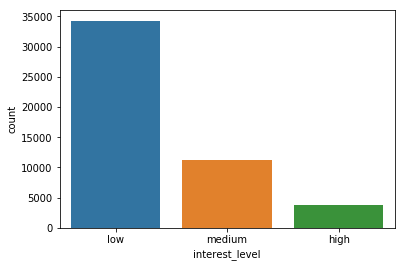

Percent of listings that have a low interest level: 69.46830928837737
Percent of listings that have a medium interest level: 22.752877289674178
Percent of listings that have a high interest level: 7.778813421948453


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train['interest_level'].describe()
#https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot
sns.countplot(x="interest_level", data=train, order=['low', 'medium', 'high'])
plt.show()

percent_interest_low = (train[train['interest_level'] == 'low'].shape[0])/train.shape[0]*100
print('Percent of listings that have a low interest level:', percent_interest_low)
percent_interest_medium = (train[train['interest_level'] == 'medium'].shape[0])/train.shape[0]*100
print('Percent of listings that have a medium interest level:', percent_interest_medium)
percent_interest_high = (train[train['interest_level'] == 'high'].shape[0])/train.shape[0]*100
print('Percent of listings that have a high interest level:', percent_interest_high)

#There is definitely going to be a class imbalance problem. Will need to employ techniques to deal with this.

### price

There are some extremely high price outliers in the dataset (more than $8000/month) <br>
These outliers account for ~3% of the data points (There are 1,469 listings with a price greater than \$8000/month) <br>
My visualizations will be zoomed in on the datapoints that are not outliers (note that all summary statistics will still have the outliers factored in) <br>


1469
2.9765764305397955
4490000
3830.174035500081
3150.0


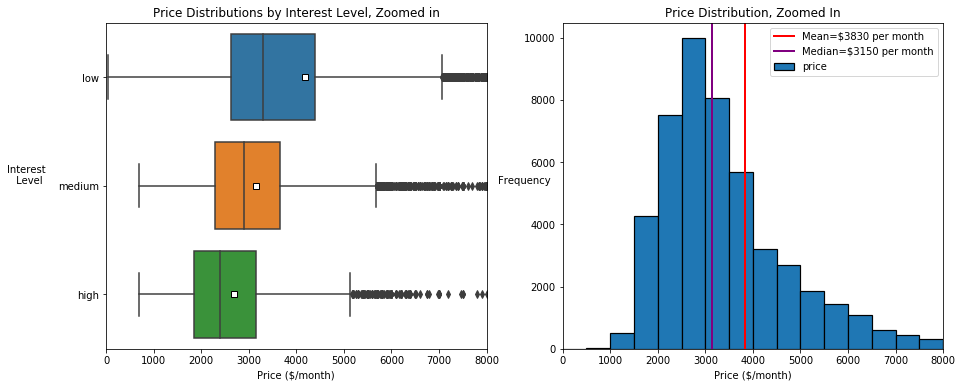

In [6]:
#width x height
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

print(len(train[train['price']>8000]))
print(len(train[train['price']>8000])/len(train)*100)
print(train['price'].max())
print(train['price'].mean())
print(np.median(train['price']))

#Same as row above, just zoomed in:
sns.boxplot(y='interest_level', x='price', data=train, order=['low', 'medium', 'high'], showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"},  ax=ax1)
ax1.set(xlim=(0,8000))
ax1.set_title('Price Distributions by Interest Level, Zoomed in')
ax1.set_xlabel('Price ($/month)')
ax1.set_ylabel('Interest \n Level', rotation=0, labelpad=30)


#sns.distplot(train['price'], ax=ax4, bins=[0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000])
ax2.hist(train['price'],edgecolor='black', linewidth=1.2, bins=[0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000])
ax2.set(xlim=(0,8000))
ax2.axvline(x=train['price'].mean(),c='red',label='Mean=$3830 per month', linewidth=2)
ax2.axvline(x=train['price'].median(),c='purple',label='Median=$3150 per month', linewidth=2)
#ax4.axvline(x=median_diff,c='purple',label='Median = 11.9 days early', linewidth=2)
ax2.set_title('Price Distribution, Zoomed In')
ax2.set_xlabel('Price ($/month)')
ax2.set_ylabel('Frequency',rotation=0, labelpad=0)
ax2.legend()


plt.show()

Observations:

Figure 1: <br>
Visually, it looks like the monthly price of the apartment may have an effect on the interest level of the apartment listing. Apartments that cost less tend to have a listing with a higher interest level. A more in depth investigation is required to see if there is a statistically significant relationship between the monthly price of the apartment and the interest level of the listing. 
*  Apartment listings w/ a higher interest level have a lower median monthly price: 
    *  Low interest level: \$3300/month
    *  Medium interest level: \$2895/month
    *  High interest level: \$2400/month
*   Apartment listings w/ a higher interest level have a lower mean monthly price: 
    *  Low interest level: \$4177/month
    *  Medium interest level: \$3159/month
    *  High interest level: \$2700/month
    
Figure 2: <br>
We can see the distribution of the prices is right-skewed. This was expected b/c of the price outliers we identified earlier: 1,469 of the 49,352 listings have a monthly price greater than \$8000 per month. The monthly price of the apartments ranged as high as $4.49 million per month.     


### bathrooms

297
1.2121798508672395
1.0


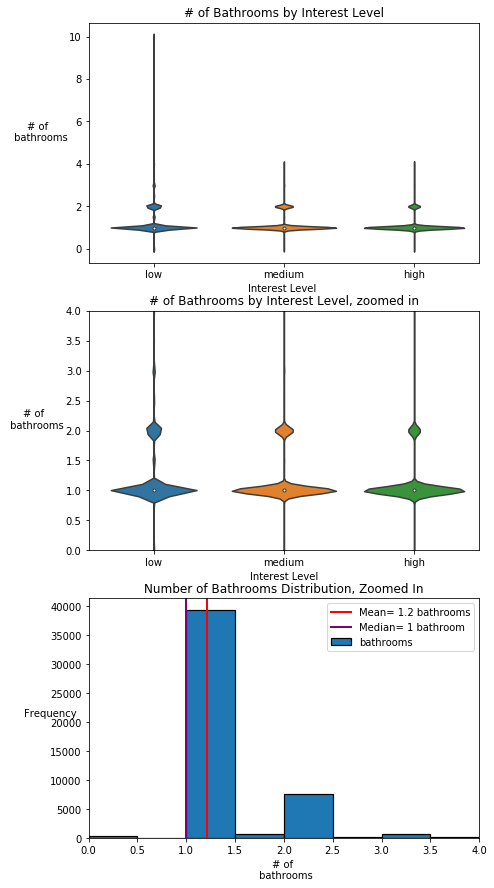

In [7]:
fig = plt.figure(figsize=(7,15))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

print(len(train[train['bedrooms']>4]))
print(train['bathrooms'].mean())
print(train['bathrooms'].median())

sns.violinplot(x='interest_level', y='bathrooms', data=train, order=['low', 'medium', 'high'], ax=ax1)
ax1.set_title('# of Bathrooms by Interest Level')
ax1.set_xlabel('Interest Level \n \n')
ax1.set_ylabel('# of \n bathrooms', rotation=0, labelpad=30)


sns.violinplot(x='interest_level', y='bathrooms', data=train, order=['low', 'medium', 'high'], ax=ax2)
ax2.set(ylim=(0,4))
ax2.set_title('# of Bathrooms by Interest Level, zoomed in')
ax2.set_xlabel('Interest Level')
ax2.set_ylabel('# of \n bathrooms', rotation=0, labelpad=30)




ax3.hist(train['bathrooms'],edgecolor='black', linewidth=1.2,bins=[0,0.5,1,1.5,2,2.5,3,3.5,4])
ax3.set(xlim=(0,4))
ax3.axvline(x=train['bathrooms'].mean(),c='red',label='Mean= 1.2 bathrooms', linewidth=2)
ax3.axvline(x=train['bathrooms'].median(),c='purple',label='Median= 1 bathroom', linewidth=2)
#ax4.axvline(x=median_diff,c='purple',label='Median = 11.9 days early', linewidth=2)
ax3.set_title('Number of Bathrooms Distribution, Zoomed In')
ax3.set_xlabel('# of \n bathrooms')
ax3.set_ylabel('Frequency',rotation=0, labelpad=0)
ax3.legend()
plt.show()

Observations:

Figure 1: <br>
Visually, it looks like the number of bathrooms doesn't seem to have much of an effect on the interest level of the apartment listing. The number of bathrooms distribution is very similar for listings with low, medium and high interest. This suggests that this feature may not be very useful for predicting the interest level of the listings. It is important to note, however, that all of the apartments that had more than 4 bathrooms (61 apartments) were all listings with a low interest level. This is perhaps b/c apartments with 4 or more bathrooms tend to be more expensive which, as seen above, more expensive apartments tend to get less interest. It may be useful to create a feature with 1 or 0 corresponding to whether the listing has more than 4 bathrooms or not. However, only 61/49,352 of the listings had more than 4 bathrooms, meaning that this feature probably wouldn't be very valuable.     

### bedrooms

2
1.5416396498622142
1.0


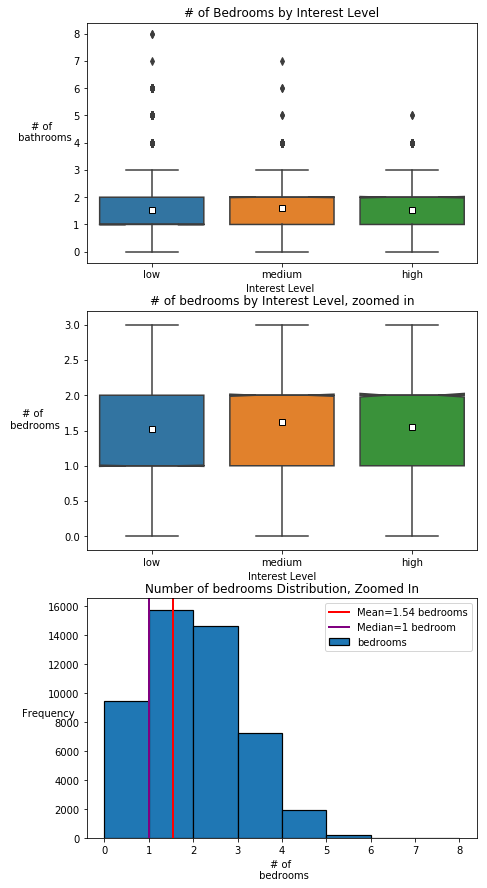

In [8]:
fig = plt.figure(figsize=(7,15))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

print(len(train[train['bedrooms']>7]))
print(train['bedrooms'].mean())
print(train['bedrooms'].median())

sns.boxplot(x='interest_level', y='bedrooms', data=train, notch=True, showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"}, order=['low', 'medium', 'high'], ax=ax1)
ax1.set_title('# of Bedrooms by Interest Level')
ax1.set_xlabel('Interest Level \n \n')
ax1.set_ylabel('# of \n bathrooms', rotation=0, labelpad=30)


sns.boxplot(x='interest_level', y='bedrooms', data=train, notch=True, showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"}, order=['low', 'medium', 'high'], ax=ax2)
ax2.set(ylim=(-0.2,3.2))
ax2.set_title('# of bedrooms by Interest Level, zoomed in')
ax2.set_xlabel('Interest Level')
ax2.set_ylabel('# of \n bedrooms', rotation=0, labelpad=30)



ax3.hist(train['bedrooms'],edgecolor='black', linewidth=1.2, bins=[0,1,2,3,4,5,6,7,8])
ax3.axvline(x=train['bedrooms'].mean(),c='red',label='Mean=1.54 bedrooms', linewidth=2)
ax3.axvline(x=train['bedrooms'].median(),c='purple',label='Median=1 bedroom', linewidth=2)
#ax4.axvline(x=median_diff,c='purple',label='Median = 11.9 days early', linewidth=2)
ax3.set_title('Number of bedrooms Distribution, Zoomed In')
ax3.set_xlabel('# of \n bedrooms')
ax3.set_ylabel('Frequency',rotation=0, labelpad=0)
ax3.legend()
plt.show()

Observations:

Figure 1: <br>
Visually, it looks like the number of bedrooms doesn't seem to have much of an effect on the interest level of the apartment listing. The number of bedrooms distribution is very similar for listings with low, medium and high interest. This suggests that this feature may not be very useful for predicting the interest level of the listings. It is important to note, however, that all of the apartments that had more than 7 bedrooms were all listings with a low interest level. This is perhaps b/c apartments with 7 or more bedrooms tend to be more expensive which, as seen above, more expensive apartments tend to get less interest. 

### latitude, longitude features
https://basemaptutorial.readthedocs.io/en/latest/subplots.html

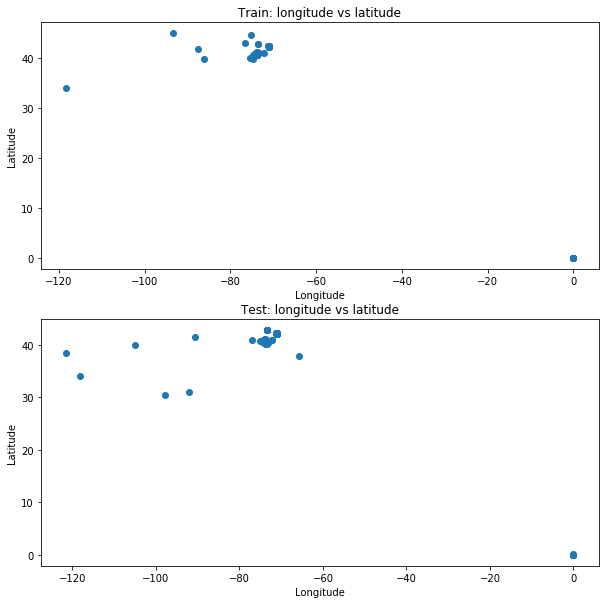

Number of train outliers: 16
Number of train coordinates with zeroes: 12 / 16
Number of test outliers: 35
Number of test coordinates with zeroes: 29 / 35


In [9]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.scatter(x=train['longitude'], y=train['latitude'])
ax1.set_title('Train: longitude vs latitude')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')


ax2.scatter(x=test['longitude'], y=test['latitude'])
ax2.set_title('Test: longitude vs latitude')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')

#col = np.where(x<1,'k',np.where(y<5,'b','r'))

#plt.scatter(x, y, c=col, s=5, linewidth=0)

#fig, axs = plt.subplots(2,1, figsize=(15,15))
#sns.scatterplot(x='longitude', y='latitude', data=train, ax=axs[0]).set_title("Plot 1")
#sns.scatterplot(x='longitude', y='latitude', data=train, ax=axs[1]).set_title("Plot 2")
plt.show()



train_outlier = train.loc[(train['latitude']<30)|(train['longitude']>-60)|(train['longitude']<-80)]
test_outlier = test.loc[(test['latitude']<30)|(test['longitude']>-60)|(test['longitude']<-80)]

train_zero = train.loc[(train['latitude']<30)|(train['longitude']>-60)]
test_zero = test.loc[(test['latitude']<30)|(test['longitude']>-60)]

print('Number of train outliers:', len(train_outlier))
print('Number of train coordinates with zeroes:', len(train_zero), '/', len(train_outlier))
print('Number of test outliers:', len(test_outlier))
print('Number of test coordinates with zeroes:', len(test_zero), '/', len(test_outlier))

Observations:<br>

1.) There seem to be outliers in both the train and test dataset (16 and 35 for the train and test datasets, respectively).<br>
2.)Most of the outliers are datapoints that have a latitude and longitude values of 0. These are incorrect values and there are some techiques I can use to correct these values.<br>
3.)There are a few datapoints in both the train and test dataset are outliers and seem to have real coordinates (4 and 6 for the train and test datasets, respectively). These datapoints (as we will see in the plots below) seem to be apartment listings not on the east coast. <br>

map projection to convert the longitude/latitude coordinates (points on a sphere) into cartesian coordinates (points on a 2D place).
using the mercator projection (look into alternatives)

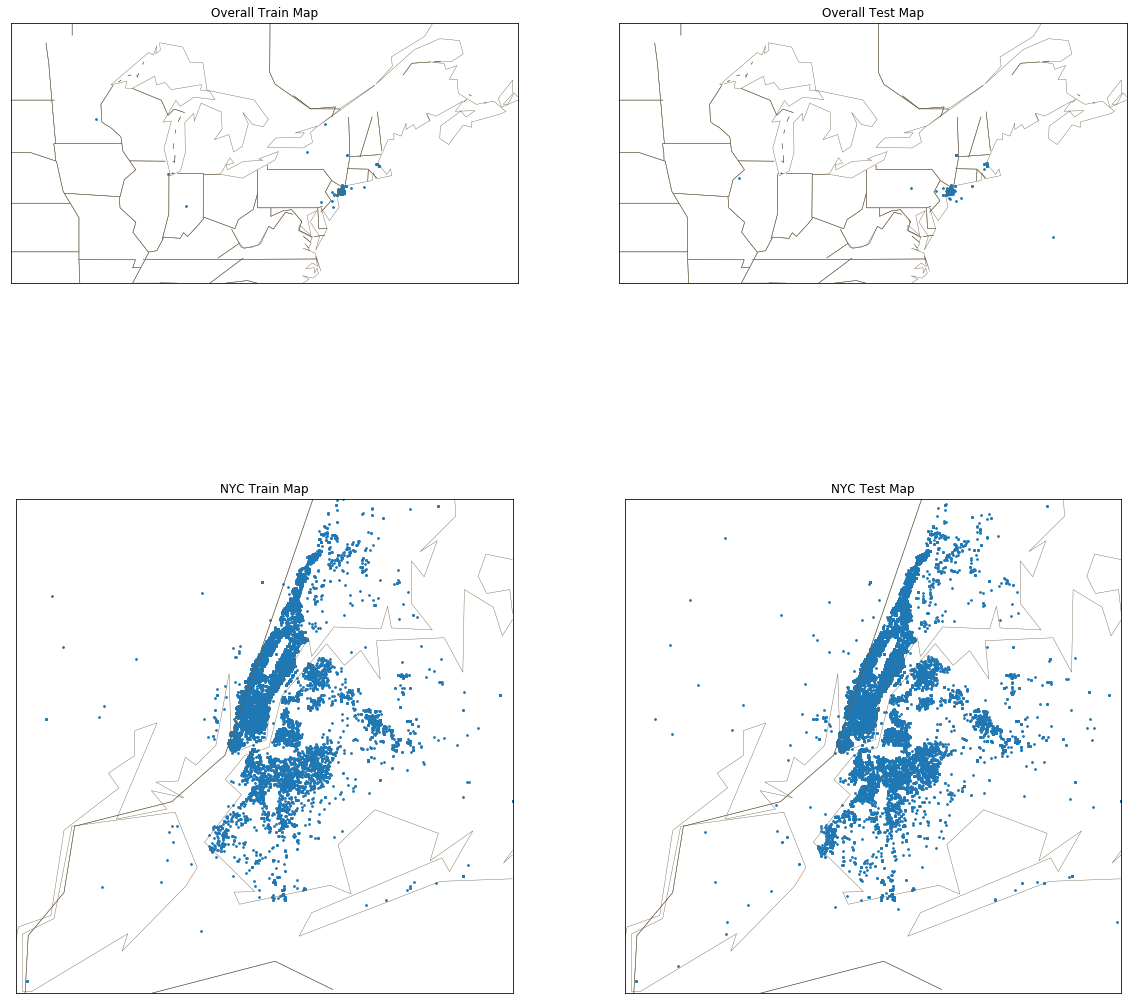

In [10]:
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)


#1. create a new basemap instance with the specific map projection we want and how much of the map we want included:
#Using the Basemap() constructor
map1 = Basemap(projection='merc', llcrnrlat=35, urcrnrlat=50, llcrnrlon=-100, urcrnrlon=-60)

#m.drawmapboundary(fill_color='#85A6D9')
map1.drawstates(color='#6D5F47')
map1.drawcoastlines(color='#6D5F47', linewidth=.4)
#m.drawrivers(color='#6D5F47', linewidth=.4)

#2. convert spherical coordinates to cartesian coordinates using the basemap instance we created

train_lon_list = list(train['longitude'])
train_lat_list = list(train['latitude'])


train_x,train_y = map1(train_lon_list, train_lat_list)

#3. Use matplotlib and basemap methods to customize map

train_x,train_y = map1(train_lon_list, train_lat_list)
ax1.scatter(train_x,train_y,s=3)
ax1.set_title('Overall Train Map')


#Repeat for test dataset
ax2 = fig.add_subplot(2,2,2)

#1
map2 = Basemap(projection='merc', llcrnrlat=35, urcrnrlat=50, llcrnrlon=-100, urcrnrlon=-60)

#m.drawmapboundary(fill_color='#85A6D9')
map2.drawstates(color='#6D5F47')
map2.drawcoastlines(color='#6D5F47', linewidth=.4)

#2
test_lon_list = list(test['longitude'])
test_lat_list = list(test['latitude'])


#3
test_x,test_y = map2(test_lon_list, test_lat_list)

ax2.scatter(test_x,test_y,s=3)
ax2.set_title('Overall Test Map')




#Creating a map specifically for NYC for both the train and test datasets.

ax3 = fig.add_subplot(223)
map3 = Basemap(
projection='merc',
llcrnrlat=40.496044,
urcrnrlat=40.915256,
llcrnrlon=-74.255735,
urcrnrlon=-73.700272,
resolution='i'
)

#m.drawmapboundary(fill_color='#85A6D9')
map3.drawstates(color='#6D5F47')
map3.drawcoastlines(color='#6D5F47', linewidth=.4)
#m.drawrivers(color='#6D5F47', linewidth=.4)

train_lon_list = list(train['longitude'])
train_lat_list = list(train['latitude'])

train_x,train_y = map3(train_lon_list, train_lat_list)


ax3.scatter(train_x,train_y,s=3)
ax3.set_title('NYC Train Map')


#Repeat for test dataset
ax4 = fig.add_subplot(224)

map4 = Basemap(
projection='merc',
llcrnrlat=40.496044,
urcrnrlat=40.915256,
llcrnrlon=-74.255735,
urcrnrlon=-73.700272,
resolution='i'
)

map4.drawstates(color='#6D5F47')
map4.drawcoastlines(color='#6D5F47', linewidth=.4)

test_lon_list = list(test['longitude'])
test_lat_list = list(test['latitude'])


test_x,test_y = map4(test_lon_list, test_lat_list)

ax4.scatter(test_x,test_y,s=3)
ax4.set_title('NYC Test Map')

plt.show()

Observations:<br>

1). The vast majority of listings seem to be in the New York City / New Jersey area. Then there are some listings scattered throughout the east coast (Massachussetts, Penselvania, New York). This part will need to be more closely examined, can potentially categorize by NYC borough.<br>
2). There are a few listings in the Midwest for the training dataset. There is one single datapoint in the test set in Illinois (this seems to be the only truly major midwest outlier for the test dataset).<br>
3). For the test dataset, there is one datapoint in the middle of the Atlantic Ocean. This datapoint probably has erroneous latitudes and longitudes. It will need to be investigated further and dealt with.<br>
4.) Could possibly group latitude/longitude ranges into categories and use that instead of lat/lon. The NYC datapoints (plots 3 and 4) will need to much more closely examined.

<b>Latitude and longitude feature engineering</b><br>
-Use latitude and longitude coordinates to classify into the five nyc boroughs as well as one category for not in any of the boroughs<br>

Six categories<br>
1.) Manhattan (40.7831 N, 73.9712 W)<br>
2.) Brooklyn (40.6782 N, 73.9442 W)<br>
3.) Staten Island (40.5795 N, 74.1502 W)<br>
4.) Bronx (40.8448 N, 73.8648 W)<br>
5.) Queens (40.7282 N, 73.7949 W)<br>
6.) None_of_boroughs (not between (40.496044 -> 40.915256) and (73.700272 -> 74.255735)) <br> 

1. Must take absolute value of longitude column so that it is in terms of longitude west.<br>
2. If latitude not in the ranges defined above, assign to 'none_of_boroughs' column (has a value of 1).<br>
3. For each datapoint<br>
        -For each of the five boroughs:<br>
        -compute latitude distance and longitude distance. <br>
        -Take pythagoram theorem of the two distances to get total distance.<br>
        -find which of five distances is smallest<br>
        -assign to column of borough with smallest distance<br>

0     Brooklyn
1    Manhattan
2    Manhattan
3    Manhattan
4    Manhattan
Name: borough, dtype: object


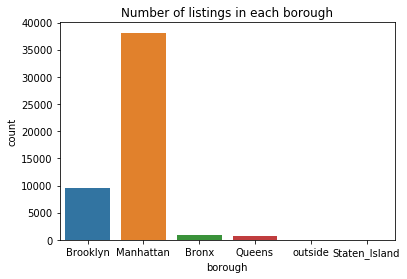

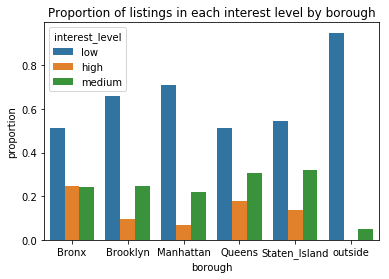

1.372789382313059e-138


In [11]:
from scipy.stats import chi2_contingency
def boroughs_calc(latitude_longitude_tuple):
    list_boroughs = ['Manhattan', 'Brooklyn', 'Staten_Island', 'Bronx', 'Queens']
    list_tuples = [(40.7831, 73.9712), (40.6782, 73.9442), (40.5795, 74.1502), (40.8448, 73.8648),  (40.7282, 73.7949)]
    distances_list=[]
    if ((latitude_longitude_tuple[0] < 40.496044) | (latitude_longitude_tuple[0] > 40.915256)):
        if ((latitude_longitude_tuple[1] < 73.700272) | (latitude_longitude_tuple[1] > 74.255735)):
            return 'outside'
    for i in list_tuples:
        lat_dist = abs(latitude_longitude_tuple[0] - i[0])
        lon_dist = abs(latitude_longitude_tuple[1] - i[1])
        total_dist = (lat_dist**2 + lon_dist**2)**0.5
        distances_list.append(total_dist)
    value, index = min((value, index) for (index, value) in enumerate(distances_list))
    
    return list_boroughs[index]

#About to do some feature engineering so combining train and test datasets together:
train_test_split_num = train.shape[0]
combined = pd.concat([train,test],axis=0, sort=False)
combined = combined.reset_index(drop=True)


#Convert latitude and longitude columns to a column of tuple(latitude, longitude)
##https://stackoverflow.com/questions/46895313/pandas-create-a-tuple-column-from-multiple-columns
combined['lat_long'] = list(zip(combined['latitude'], abs(combined['longitude'])))


combined['borough'] = combined['lat_long'].apply(boroughs_calc)
print(combined['borough'].head())


#Doing some data exploration so need to split the combined dataset back into the train and test datasets:
#Extracting out both train and test datasets:
train = combined.loc[:(train_test_split_num-1)]
test = combined.loc[train_test_split_num:]

sns.countplot(x="borough", data=train).set_title('Number of listings in each borough')
plt.show()

group_boroughs = train['interest_level'].groupby(train['borough']).value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(x='borough', y="proportion", hue="interest_level", data=group_boroughs).set_title('Proportion of listings in each interest level by borough')
plt.show()
chisq_value, pvalue, df, expected = chi2_contingency(pd.crosstab(train['borough'], [train["interest_level"]]))
print(pvalue)

Observations:<br>
Plot 1: The vast majority of listings are in Manhattan with some in Brooklyn.<br>
Plot 2: The ratio of different interest levels varies pretty significantly between each borough. Listings not in any of the five NYC boroughs (labeled 'outside') is almost entirely listings with an interest level of 'low'. This makes sense b/c very few people are going to be interested in apartments outside of NYC for a mostly-NYC apartments website.<br> 
The multi-category chi-square test on "boroughs" and "interest_level" has a VERY low p-value (a significantly significant one), indicating that there may be a relationship/association between 'borough' and 'interest_level'. This reinforces the observations that can be made visually from Plot 2.


### created feature

https://stackoverflow.com/questions/41869206/generate-seaborn-countplot-using-column-value-as-count
https://stackoverflow.com/questions/28009370/get-weekday-day-of-week-for-datetime-column-of-dataframe


It looks like the dataset consists of apartments listed between April 1st, 2016 through June 29th, 2016.

Since this dataset only spans ~3 months, we can't analyze seasonal trends to see if there is a relationship between the time of year that the listing is posted and its interest_level. 

We could analyze and see if the day of the week or the hour of the data of the initial posting or the month (April, May or June) has any impact on the interest level of the listing.

In [12]:
from datetime import datetime
from dateutil.parser import parse

#About to do some feature engineering so combining train and test datasets together:
combined = pd.concat([train,test],axis=0, sort=False)

combined['created'] = pd.to_datetime(combined['created'])

#Is the date in UTC (coordinated universal time) or is it in Eastern time? What time zone is this?

print(combined['created'].describe())

count                  124011
unique                 119722
top       2016-05-05 01:22:05
freq                        4
first     2016-04-01 22:12:41
last      2016-06-29 21:55:35
Name: created, dtype: object


In [13]:
#The weekday, hour, and month are worth exploring
combined['created_weekday'] = combined['created'].dt.dayofweek
combined['created_hour'] = combined['created'].dt.hour
combined['created_month'] = combined['created'].dt.month


#bin this into morning, afternoon, evening, night and plot
#Note that I have a cut point of -1 rather than 0 b/c I guess it is not inclusive. If I have 0, datapoints with an hour of 0 are NOT binned.
cut_points = [-1,5,10,17,23]
label_names = ["night","morning","afternoon","evening"]
combined["hour_categories"] = pd.cut(combined['created_hour'],cut_points,labels=label_names)

-Note that seaborn (or matplotlib.pyplot for that matter) do NOT seem to have a built in parameter to plot the proportion of counts by each subgroup. The seaborn countplot, for example, only plots that the raw count of each subgroup, not the proportion within that subcategory. The problem with this, is that if there is a huge imbalance between the counts of each grouping, then very little insight can be gleaned from the plot. For example, the grouping of night has a much higher count of listings than any other hour_category. That makes it harder to compare to other categories because even the subcategory with the least count in this grouping (high interest level listings) towers over the subcategories of all other groupings.<br><br>
-I am going to create plots where the y-value for each subgroup is the proportion of counts within the group. For example, within the night group, the value for high, medium and low interest level will its respective count proportion within the night group. <br><br>
-I will accomplish this by creating a dataframe where one of the columns is the proportion within each subgroup. I will use this column as the y-value in a Seaborn barplot.<br><br>

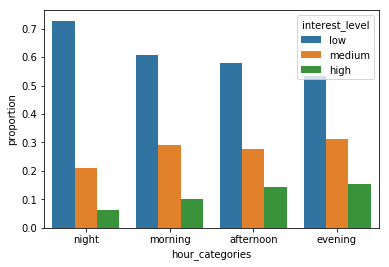

Multi-category chi-square test on "hour_categories" and "interest_level"
P-value: 3.3073026868946225e-208


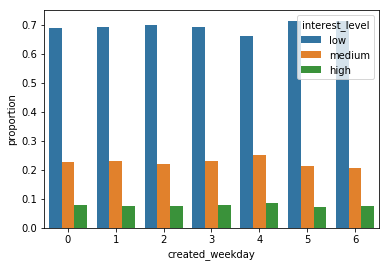

Multi-category chi-square test on "created_weekday" and "interest_level"
P-value: 1.3357444287492848e-08


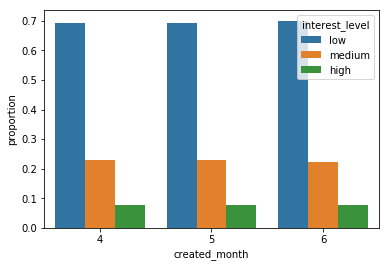

Multi-category chi-square test on "created_month" and "interest_level"
P-value: 0.37840353401961313


In [14]:
#Doing some data exploration so need to split the combined dataset back into the train and test datasets:
#Extracting out both train and test datasets:
train = combined.loc[:(train_test_split_num-1)]
test = combined.loc[train_test_split_num:]

list_dates = ['hour_categories', 'created_weekday', 'created_month']
dates_pvalue = []

for i in list_dates:
    chisq_value, pvalue, df, expected = chi2_contingency(pd.crosstab(train[i], [train["interest_level"]]))
    dates_pvalue.append(pvalue)
    
    



#The groupyby() DataFrame method, in conjunction with the value_counts() method, returns a Series where the 'interest_level' column is grouped into groups for each 'hour_categories' value. 
#The value_counts returns the count of each interest_level value in each hour_categories group.
group_hourcategories = train['interest_level'].groupby(train['hour_categories']).value_counts()

#Setting the normalize parameter in the value_counts() method returns the proportion (rather than the count) of each interest_level value in each hour_categories group.
group_hourcategories = train['interest_level'].groupby(train['hour_categories']).value_counts(normalize=True)

#The rename() method renames the Series column to the input parameter, so in this case it is rename to 'proportion'
group_hourcategories = train['interest_level'].groupby(train['hour_categories']).value_counts(normalize=True).rename('proportion')

#The reset_index() method takes the 'hour_categories' and 'interest_level' grouping that are currently the index for the series and makes them into columns of a DataFrame and the index is reset.
#The result is a dataframe with three columns: hour_categories, interest_level and proportion
group_hourcategories = train['interest_level'].groupby(train['hour_categories']).value_counts(normalize=True).rename('proportion').reset_index()

#We can then plot this is as a barplot, where x is the hour_categories column, y is proportion column, and the hue is the interest_level.

sns.barplot(x="hour_categories", y="proportion", hue="interest_level", data=group_hourcategories)
plt.show()
print('Multi-category chi-square test on "hour_categories" and "interest_level"')
print('P-value:', dates_pvalue[0])

#Repeat for the 'created_weekday' feature:

group_createdweekday = train['interest_level'].groupby(train['created_weekday']).value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(x='created_weekday', y="proportion", hue="interest_level", data=group_createdweekday)
plt.show()
print('Multi-category chi-square test on "created_weekday" and "interest_level"')
print('P-value:', dates_pvalue[1])
#Repeat for the 'created_month' feature:

group_createdmonth = train['interest_level'].groupby(train['created_month']).value_counts(normalize=True).rename('proportion').reset_index()
sns.barplot(x='created_month', y="proportion", hue="interest_level", data=group_createdmonth)
plt.show()
print('Multi-category chi-square test on "created_month" and "interest_level"')
print('P-value:', dates_pvalue[2])

Observations:<br>
Plot 1:<br> The proportion of listings with an interest level of 'high' is highest for listings that are posted in the afternoon and evening. There is a decrease in the proportion of 'high' interest listings for those posted in the morning and an even further decrease for those posted in the night. The oppostite trend occurs for listings with an interest level of 'low'. This is further supported by the fact that the p-value for a multi-category Chi-Square test on 'hour_categories' and 'interest_level' is ~0. There is a statistically significant relationship between 'hour_categories' and 'interest_level'. Both of these findings (the plot and the Chi-square test p-value) are evidence that a relationship between 'hour_categories' and 'interest_level' exists.<br>
This actually makes intuitive sense. Listings at posted at night may not get as much interest b/c people are sleeping and the listings will get buried by more recent postings in the morning and afternoon. Perhaps this is why listings posted at night, have a higher proportion of listings with 'low' interest and a lower proportion of listings with 'high' interest. <br>
Listings posted in the afternoon and evening may get more interest because people are done with work and may have more free time to check the website. Perhaps this is why listings posted in the afternoon and evening have a lower proportion of listings with 'low' interest and a high proportion of listings with 'high' interest. <br>
Plot 2:<br> There doesn't seem to be much of a noticeable trend between the day of the week that the listing is posted and the interest level. However, the p-value for a multi-category Chi-Square test on 'created_weekday' and 'interest_level' is ~0. This is a statistically significant result and indicates there may be a relationship/association between 'created_weekday' and 'interest_level'.<br>
Plot 3:<br> There doesn't seem to be any noticeable trend between the month (April, May, June) that the listing is posted and the interest level. This is further supported by the fact that the p-value for a multi-category Chi-Square test on 'created_month' and 'interest_level' is 0.37 which is very high. This indicates there there isn't a statistically significant relationship between 'created_month' and 'interest_level'. This makes intuitive sense because there doesn't seem to be any reason why listings would get more interest between the months of April, May, June.<br>


### 'features' feature
The 'features' column contains a list of strings for each datapoint. Each string describes a feature of that listing. <br>

Combine all lists together, count the frequency of each unique feature and analyze the top 10 or so most frequent features and see if there are any relationships/associations for them with interest level. Can create a new column where the value is 0 for the absence of the feature and 1 for the presence of the feature. This could be a great way to create new features with a strong relationship/association with the interest level.<br>

Look at frequency of top feature phrases:<br>
1.) convert Series of lists into one long list.<br>
2.) the individual entries are already delimited how i want (each element is a phrase).<br>
3.) lowercase all words and anything else to standardize it.<br>
4.) use dictionary to store frequency count of each phrase where the key:value is the phrase:frequency.
5.) sort by dictionary keys with highest values.<br>

Examine if any trend with these most frequent feature phrases:<br>
1.) Create new column for each feature phrase with 0 for absence of phrase in 'features' and 1 for presence of the phrase.<br>
2.) Analyze subgroup bar plots of each phrase vs the interest level. Look for any visual trends that indicate a relationship/association.<br>
3.) Calculate a multi-category Chi-squared value for this phrase and the interest level to see if a statistical relationship between the phrase and interest level exists. <br>

In [15]:
import re

#Note to self: make sure to take note of what a method() or function() returns. 
#Some methods/functions modify the object in place (a side effect) and do not return anything (NOT a pure function)
#Some methods/functions return a new object and don't mofiy the object in place (no side effects) (a pure function if there are no random elements)

#Going to be doing some feature engineering so need to recombine train and test datasets:
combined = pd.concat([train,test],axis=0, sort=False)

def normalize_characters(feature_sublist):
    if len(feature_sublist) == 0:
        return feature_sublist
    feature_newsublist = []
    for entry in feature_sublist:
        entry = entry.lower()
        #Substitute anything that isn't a letter (a-z) or a number (0-9) or white space (\s) with nothing
        #This remove any special characters and standardizes each entry
        entry = re.sub("[^a-z0-9\s]", "", entry)
        feature_newsublist.append(entry)

    return feature_newsublist

#standardize the list entries (lowercase all letters and remove special characters)
combined['features_stand'] = combined['features'].apply(normalize_characters)

#Convert Series to list of lists 
list_features = list(combined['features_stand'])

#Convert list of lists into one list        
list_features = [list_element for sublist in list_features for list_element in sublist]

#Count the frequency of each feature and keep track of it in a dictionary
feature_dict = {}
for feature in list_features:
    if feature in feature_dict:
        feature_dict[feature] += 1
    if feature not in feature_dict:
        feature_dict[feature] = 1

#Sort the dictionary so in descending order by the frequency count (the value) or each feature (the key)
#There isn't a standalone method of function that can sort dictionaries.

#This converts the dictionary into a list of tuples where the tuple is (value, key)
list_tuples_frequency = [(key, feature_dict[key]) for key in feature_dict]

#there is list method, sort(), that sorts the list 
#https://docs.python.org/3/library/stdtypes.html#list.sort

#the key parameter in sort() allows us to specify a function where we can specify what criteria to use for sorting
#I want to sort by the value (the frequency count) in the tuple. Reminder that our tuple is (key, value)
def sort_value(tuple_entry):
    return tuple_entry[1]

list_tuples_frequency.sort(key=sort_value, reverse=True)

#20 most common features:
print(list_tuples_frequency[0:20])


#Look into chi-square tests

[('elevator', 65833), ('cats allowed', 59194), ('hardwood floors', 59155), ('dogs allowed', 55207), ('doorman', 52505), ('dishwasher', 52038), ('laundry in building', 47484), ('no fee', 45458), ('fitness center', 33420), ('prewar', 26544), ('laundry in unit', 23752), ('roof deck', 16466), ('outdoor space', 13414), ('dining room', 12847), ('high speed internet', 10622), ('balcony', 7793), ('swimming pool', 7153), ('new construction', 6457), ('terrace', 5707), ('exclusive', 5470)]


In [16]:
#creates features like: elevator_fl, hardwood_fl, cats_fl etc. (fl mean feature listed)
#Do chi-square tests between these new features and the interest_level.
#Iterating over the rows in a DataFrame is much faster using the apply() method, compared to the iterrows() method or converting to an ndarray and iterating over that
#https://medium.com/@rtjeannier/pandas-101-cont-9d061cb73bfc

In [17]:
def new_features(feature_sublist, tuple_arguments):
    feature_variable = 0
    feature_string_f = tuple_arguments
    if feature_string_f in feature_sublist:
        feature_variable = 1
    
    return feature_variable

feature_names = ['elevator_fl', 'hardwood_fl', 'cats_fl', 'dogs_fl', 'doorman_fl', 'dishwasher_fl', 'laundrybuild_fl', 'nofee_fl', 'fitnesscenter_fl', 'prewar_fl', 'laundryunit_fl']
feature_strings = ['elevator', 'hardwood floors', 'cats allowed', 'dogs allowed', 'doorman', 'dishwasher', 'laundry in building', 'no fee', 'fitness center', 'prewar', 'laundry in unit']


for i in range(len(feature_names)):
    feature_name = feature_names[i]
    feature_string = feature_strings[i]
    print(feature_string)
    #The pandas apply() method is substantially faster than using the iterrows() method or iterating over a numpy array.
    combined[feature_name]=combined['features_stand'].apply(new_features, args=(feature_string,))
    
#Create feature that is the number of features for each datapoint:
combined['num_features_listed'] = combined['features'].apply(len)

elevator
hardwood floors
cats allowed
dogs allowed
doorman
dishwasher
laundry in building
no fee
fitness center
prewar
laundry in unit


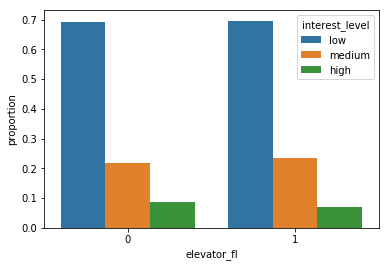

Multi-category chi-square test on elevator_fl and interest_level
P-value: 8.380783002816964e-16


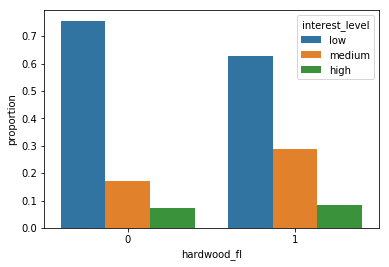

Multi-category chi-square test on hardwood_fl and interest_level
P-value: 2.6383924669581173e-230


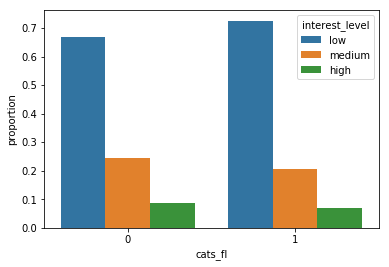

Multi-category chi-square test on cats_fl and interest_level
P-value: 7.623543932014798e-44


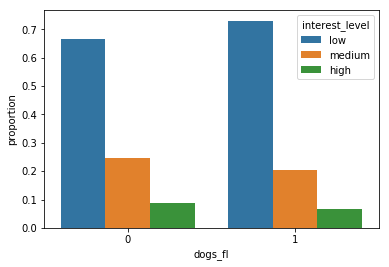

Multi-category chi-square test on dogs_fl and interest_level
P-value: 1.8240786560695087e-52


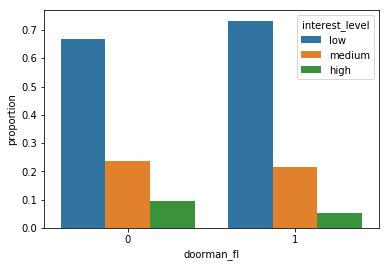

Multi-category chi-square test on doorman_fl and interest_level
P-value: 2.1888130464645906e-85


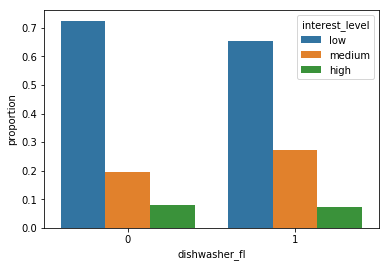

Multi-category chi-square test on dishwasher_fl and interest_level
P-value: 2.9339782705967864e-94


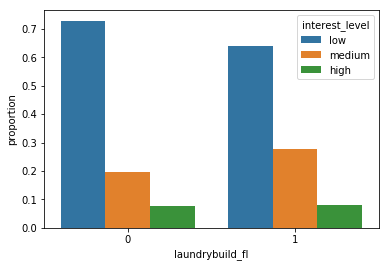

Multi-category chi-square test on laundrybuild_fl and interest_level
P-value: 1.6936437046768544e-106


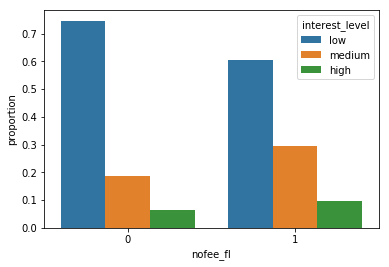

Multi-category chi-square test on nofee_fl and interest_level
P-value: 4.750446895987362e-230


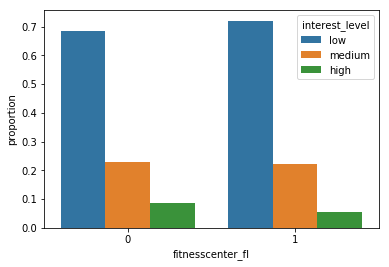

Multi-category chi-square test on fitnesscenter_fl and interest_level
P-value: 1.7021365587707385e-30


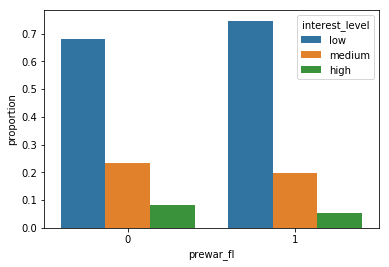

Multi-category chi-square test on prewar_fl and interest_level
P-value: 2.589557118539674e-42


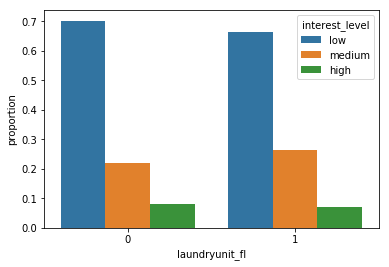

Multi-category chi-square test on laundryunit_fl and interest_level
P-value: 1.1265209045004944e-21


In [18]:
#About to do some data exploration so need to separate out train and test datasets:
train = combined.loc[:(train_test_split_num-1)]
test = combined.loc[train_test_split_num:]

feature_pvals = []
for i in range(len(feature_names)):
    grouped_feature = train['interest_level'].groupby(train[feature_names[i]]).value_counts(normalize=True).rename('proportion').reset_index()
    sns.barplot(x=feature_names[i], y="proportion", hue="interest_level", data=grouped_feature)
    plt.show()
    chisq_value, pvalue, df, expected = chi2_contingency(pd.crosstab(train[feature_names[i]], [train["interest_level"]]))
    feature_pvals.append(pvalue)
    print('Multi-category chi-square test on', feature_names[i] ,'and interest_level')
    print('P-value:', feature_pvals[i])
    


### 'descriptions' feature

Idea: Look through the data and see if there are any intuitive choices for what could be a good predictor for the interest level. words like 'new', 'beautiful', 'renovated', 'prewar', etc.. then make new feature for each and do similar analysis.

In [19]:
def normalize_description(description_string):
    description_string = description_string.lower()
    #Substitute anything that isn't a letter (a-z) or a number (0-9) or white space (\s) with nothing
    #This remove any special characters and standardizes each string
    description_string = re.sub("[^a-z0-9\s]", "", description_string)
    return description_string

#About to do some feature engineering so combining train and test datasets together:
combined = pd.concat([train,test],axis=0, sort=False)

combined['description_stand'] = combined['description'].apply(normalize_description)

#list of potentially useful phrases or words in the description that may have a relationship with the interest level
key_phrases = ['new', 'granite', 'designed', 'washer', 'dryer',  'steel', 'pre-war', 'renovated', 'brick', 'marble', 'breathtaking']

#combined['description_stand']

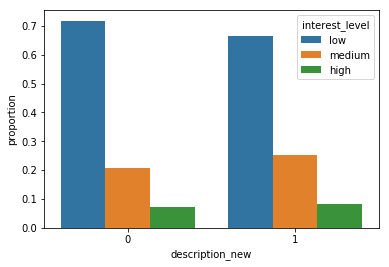

Multi-category chi-square test on description_new and interest_level
P-value: 1.283541207822097e-35


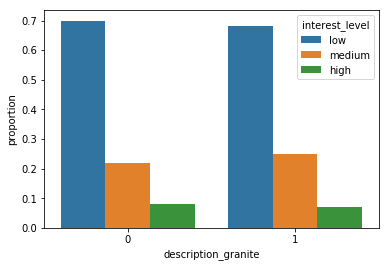

Multi-category chi-square test on description_granite and interest_level
P-value: 1.2767034302867195e-12


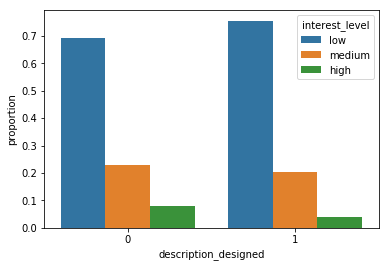

Multi-category chi-square test on description_designed and interest_level
P-value: 6.492361804410221e-10


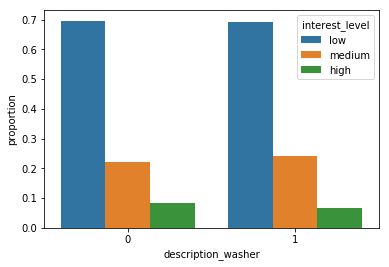

Multi-category chi-square test on description_washer and interest_level
P-value: 2.6719862954247402e-15


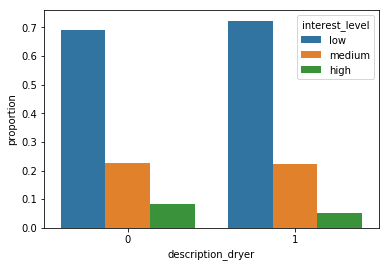

Multi-category chi-square test on description_dryer and interest_level
P-value: 1.3683072195060689e-17


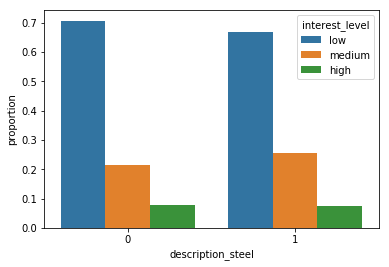

Multi-category chi-square test on description_steel and interest_level
P-value: 1.3457132316940572e-22


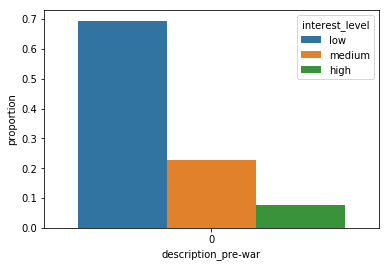

Multi-category chi-square test on description_pre-war and interest_level
P-value: 1.0


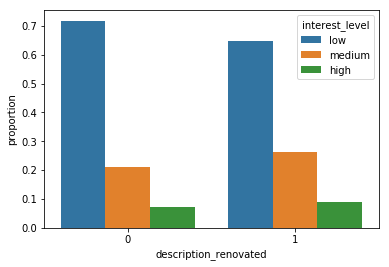

Multi-category chi-square test on description_renovated and interest_level
P-value: 2.5470364117354544e-57


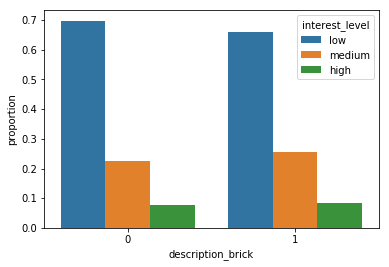

Multi-category chi-square test on description_brick and interest_level
P-value: 5.7561907379450065e-06


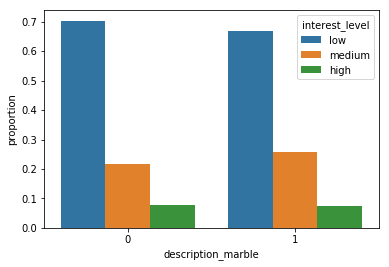

Multi-category chi-square test on description_marble and interest_level
P-value: 1.0437014904933399e-18


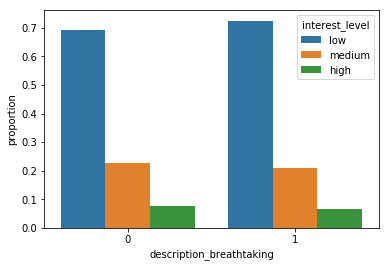

Multi-category chi-square test on description_breathtaking and interest_level
P-value: 0.11892543297611528


In [20]:
description_names = ['description_new', 'description_granite', 'description_designed', 'description_washer', 'description_dryer', 
                     'description_steel', 'description_pre-war', 'description_renovated', 'description_brick', 'description_marble', 
                     'description_breathtaking']
description_strings = ['new', 'granite', 'designed', 'washer', 'dryer',  'steel', 'pre-war', 'renovated', 'brick', 'marble', 'breathtaking']


for i in range(len(description_names)):
    description_name = description_names[i]
    description_string = description_strings[i]
    #print(description_string)
    #The pandas apply() method is substantially faster than using the iterrows() method or iterating over a numpy array.
    combined[description_name]=combined['description_stand'].apply(new_features, args=(description_string,))



#This feature is a metric for how much a description was given for each listing
combined['words_in_description'] = combined['description'].apply(lambda x: len(x.split(" ")))

#Doing some data exploration so need to split the combined dataset back into the train and test datasets:
#Extracting out both train and test datasets:
train = combined.loc[:(train_test_split_num-1)]
test = combined.loc[train_test_split_num:]    

description_pvals = []
for i in range(len(description_names)):
    grouped_description = train['interest_level'].groupby(train[description_names[i]]).value_counts(normalize=True).rename('proportion').reset_index()
    sns.barplot(x=description_names[i], y="proportion", hue="interest_level", data=grouped_description)
    plt.show()
    chisq_value, pvalue, df, expected = chi2_contingency(pd.crosstab(train[description_names[i]], [train["interest_level"]]))
    description_pvals.append(pvalue)
    print('Multi-category chi-square test on', description_names[i] ,'and interest_level')
    print('P-value:', description_pvals[i])

### 'display_address' and 'street_address' features
1.) For now, am just going to be exploring the 'display_address' feature b/c the 'street_address' feature is just a more specific version of it. 
2.) Could look and see if particular street names have a relationship with interest level. Am going to skip this for now b/c doubtful of what value this could actually bring.

### 'photos' feature 
1.) Examine if relationship between if has photos / if doesn't have photos and interest level.<br>
2.) Examine if relationship between # of photos and interest level.<br>
3.) To take into account the actual content of the photos, would need some advanced computer vision techniques. Am going to skip over this for the time being. Doubtful that there would be much of a return in prediction accuracy for the extensive amount of work that it would require.<br>

In [21]:
def num_photos(photos_list):
    number_photos = len(photos_list)
    return number_photos

#About to do some feature engineering so combining train and test datasets together:
combined = pd.concat([train,test],axis=0, sort=False)

combined['number_of_photos'] = combined['photos'].apply(num_photos)
combined['has_photos'] = 0
combined.loc[combined['number_of_photos']>0,'has_photos'] = 1

Multi-category chi-square test on "has_photos" and interest_level
P-value: 1.747176239450903e-265


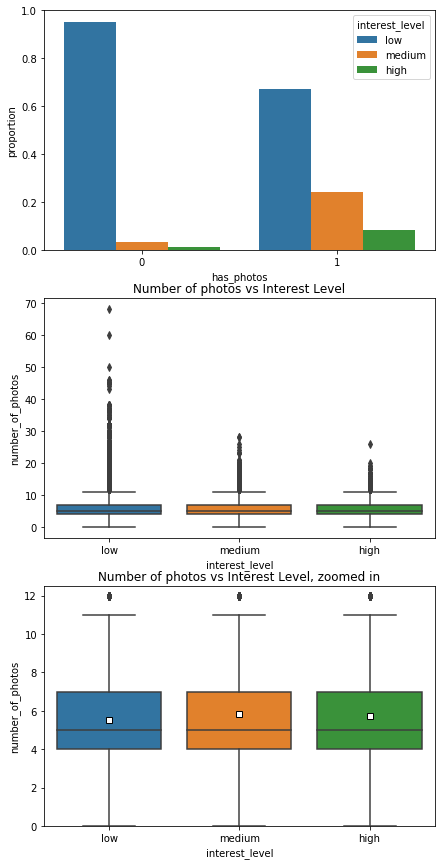

In [22]:
#Doing some data exploration so need to split the combined dataset back into the train and test datasets:
#Extracting out both train and test datasets:
train = combined.loc[:(train_test_split_num-1)]
test = combined.loc[train_test_split_num:]

grouped_has_photos = train['interest_level'].groupby(train['has_photos']).value_counts(normalize=True).rename('proportion').reset_index()

fig = plt.figure(figsize=(7,15))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)


sns.barplot(x='has_photos', y="proportion", hue="interest_level", data=grouped_has_photos, ax=ax1)
chisq_value, pvalue, df, expected = chi2_contingency(pd.crosstab(train['has_photos'], [train["interest_level"]]))
print('Multi-category chi-square test on "has_photos" and interest_level')
print('P-value:', pvalue)


#sns.boxplot(x='interest_level', y='bedrooms', data=train, notch=True, order=['low', 'medium', 'high'], ax=ax4)
#sns.barplot(x='number_of_photos', y='interest_level', data=train, order=['low', 'medium', 'high']).set_title("Number of photos vs Interest Level")
sns.boxplot(x='interest_level', y='number_of_photos', data=train, ax=ax2, order=['low', 'medium', 'high']).set_title("Number of photos vs Interest Level")


sns.boxplot(x='interest_level', y='number_of_photos', data=train, ax=ax3, showmeans=True, meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"black"}, order=['low', 'medium', 'high']).set_title("Number of photos vs Interest Level, zoomed in")
ax3.set(ylim=(0,12.5))
plt.show()

Observations:

Figure 1: <br>
Visually, this suggests that whether a listing has photos or not seems to have a big impact on the interest level of the listing. Listings without photos tend to be more of low interest and less medium/high interest. Listings with photos are more likely to be of medium/high interest. Note that this result makes sense: an apartment listing is going to get more interest if you can see what it looks like. Also note that even when a listing has photos, it is still most likely to be of low interest. This is b/c of how imbalanced this dataset is: Almost 70% of the listings are low interest. Techniques to deal with this class imbalance will need to be employed.


Figure 3: <br>
Visually, it looks like the number of photos (excluding whether this listing has photos or not) doesn't seem to have much of an effect on the interest level of the apartment listing. The number of photos distribution is very similar for listings with low, medium and high interest. This suggests that this feature may not be very useful for predicting the interest level of the listings. Note that all of the apartments that had more than ~30 photos were all listings with a low interest level. This is perhaps simply b/c so many of the apartments are of low interest (~70% of the dataset). 

### manager_id feature

In [23]:
from scipy.stats import chi2_contingency

print('For the train dataset, there are ', len(train['manager_id'].unique()), 'managers. This is an average of ', len(train)/len(train['manager_id'].unique()), 'listings per manager.')
print('For the test dataset, there are ', len(test['manager_id'].unique()), 'managers. This is an average of ', len(test)/len(test['manager_id'].unique()), 'listings per manager.')

print('\n',train.groupby(['manager_id'])['manager_id'].count().sort_values(ascending=False).iloc[0:10])
#print(test.groupby(['manager_id'])['manager_id'].count().sort_values(ascending=False))
#df.groupby(['Type','Name'])['Type'].agg({'Frequency':'count'})

combined = pd.concat([train,test],axis=0, sort=False)
manager_feature_names = ['manager_one', 'manager_two', 'manager_three', 'manager_four', 'manager_five', 'manager_six', 'manager_seven', 'manager_eight', 'manager_nine', 'manager_ten']
manager_ids = ['e6472c7237327dd3903b3d6f6a94515a', '6e5c10246156ae5bdcd9b487ca99d96a', '8f5a9c893f6d602f4953fcc0b8e6e9b4', '62b685cc0d876c3a1a51d63a0d6a8082', 'cb87dadbca78fad02b388dc9e8f25a5b', '9df32cb8dda19d3222d66e69e258616b', 'b7de4cb395920136663132057fa89d84', '2aa9bfa5f67ed9997ea341dee8a3a271', 'ad3d8ddc52c7e0859b5c6c7f7949c3bd', 'c9c33695ee2a2f818e9f1d8f7d1c4b39']

for index, value in enumerate(manager_feature_names):
    combined[manager_feature_names[index]] = 0
    combined.loc[combined['manager_id']==manager_ids[index], manager_feature_names[index]] =1

#Doing some data exploration so need to split the combined dataset back into the train and test datasets:
#Extracting out both train and test datasets:
train = combined.loc[:(train_test_split_num-1)]
test = combined.loc[train_test_split_num:]

    
manager_pvals = []
for i in manager_feature_names:
    chisq_value, pvalue, df, expected = chi2_contingency(pd.crosstab(train[i], train["interest_level"]))
    manager_pvals.append(pvalue)
    

print('\nMulti-category chi-square test on each of the ten managers with the most listings and interest_level')
print('P-values:', manager_pvals)

For the train dataset, there are  3481 managers. This is an average of  14.177535191037059 listings per manager.
For the test dataset, there are  3851 managers. This is an average of  19.38691249026227 listings per manager.

 manager_id
e6472c7237327dd3903b3d6f6a94515a    2533
6e5c10246156ae5bdcd9b487ca99d96a     711
8f5a9c893f6d602f4953fcc0b8e6e9b4     410
62b685cc0d876c3a1a51d63a0d6a8082     402
cb87dadbca78fad02b388dc9e8f25a5b     373
9df32cb8dda19d3222d66e69e258616b     330
b7de4cb395920136663132057fa89d84     320
2aa9bfa5f67ed9997ea341dee8a3a271     316
ad3d8ddc52c7e0859b5c6c7f7949c3bd     305
c9c33695ee2a2f818e9f1d8f7d1c4b39     299
Name: manager_id, dtype: int64

Multi-category chi-square test on each of the ten managers with the most listings and interest_level
P-values: [0.024436537752024267, 1.5107176581244428e-34, 4.278333560017522e-37, 2.0849775243986476e-39, 1.1833397678175898e-43, 1.040878363808508e-06, 5.175645824669261e-29, 3.7327126721548036e-11, 9.326404874101923e-17,

# 2. data pre-processing & cleaning
1.) Drop features that are not useful in predicting the interest level of the listings<br>
2.) Handle missing values<br>
3.) Look for skew in features<br>


In [24]:
#1.) 
#The follow features don't seem to have a particularly useful relationship with the interest level of the listings: 
useless_features = ['listing_id',  'building_id']
#Dropping the useless features:
combined = pd.concat([train,test],axis=0, sort=False)
combined = combined.drop(['listing_id', 'manager_id', 'building_id'], axis=1)
print('Dropped:', useless_features)


#2.)
#There are no missing values in either dataset:
combined_missing_series = combined.isnull().sum()
#Note that I am subtracting 1 b/c the combined dataset has missing values in the 'interest_level' column for any datapoints that came from the test dataset
#This is expected 
print('combined has', len(combined_missing_series.loc[combined_missing_series>0])-1, 'columns with missing values (excluding the "interest_level" column).')

#3. 
from scipy.stats import skew
from scipy.special import boxcox1p

#Evaluate the skew for all of the features
feature_skew_ndarray=combined.select_dtypes(include=['int', 'float']).apply(lambda x: skew(x))
#Convert the ndarray into a pandas Series and sort from highest to lowest
feature_skew_series=pd.Series(feature_skew_ndarray).sort_values(ascending=False)
#Filter the series so that only the skewed features remain
#Setting the threshold for greater than 0.5 skew or less than -0.5 skew (pretty arbitarily, need to play around with)
skewed_features = feature_skew_series.loc[(feature_skew_series>0.5)|(feature_skew_series<-0.5)]
print(skewed_features)

#I will need to deal with these skewed features...


Dropped: ['listing_id', 'building_id']
combined has 0 columns with missing values (excluding the "interest_level" column).
bathrooms    53.997887
longitude    50.590641
latitude    -54.241815
dtype: float64


# 3. Feature transformations

Almost all of the feature engineering was done alongside the data exploration.

Ideas from suggestions: <br>
1. Use of 'manager_id' as features<br>
2. Latitude and longitude into boroughs<br>
3. Number of words in description as feature<br>

In [25]:
#2
features_not_using = ['display_address', 'street_address']
combined = combined.drop(features_not_using, axis=1)

#3
columns_not_needed = ['latitude', 'longitude', 'lat_long', 'created', 'created_hour', 'created_month', 'features', 'features_stand', 'description', 'description_stand', 'photos']
combined = combined.drop(columns_not_needed, axis=1)

In [26]:
from sklearn.preprocessing import StandardScaler

#Some of the numerical features still need to be normalized
numerical_to_normalize = ['bathrooms', 'bedrooms', 'price', 'num_features_listed', 'words_in_description', 'number_of_photos']
combined_numerical = combined[numerical_to_normalize]

#StandardScaler's fit and transform methods require an input of an ndarray
combined_numerical_ndarray = combined_numerical.values
scaler = StandardScaler()
scaler.fit(combined_numerical_ndarray)
scaled_values_ndarray = scaler.transform(combined_numerical_ndarray)

combined_numerical = combined_numerical.copy()

#Need to combine this ndarray back into a DataFrame:
combined.loc[:,numerical_to_normalize] = scaled_values_ndarray

combined.head()

,bathrooms,bedrooms,price,interest_level,borough,created_weekday,hour_categories,elevator_fl,hardwood_fl,cats_fl,dogs_fl,doorman_fl,dishwasher_fl,laundrybuild_fl,nofee_fl,fitnesscenter_fl,prewar_fl,laundryunit_fl,num_features_listed,description_new,description_granite,description_designed,description_washer,description_dryer,description_steel,description_pre-war,description_renovated,description_brick,description_marble,description_breathtaking,words_in_description,number_of_photos,has_photos,manager_one,manager_two,manager_three,manager_four,manager_five,manager_six,manager_seven,manager_eight,manager_nine,manager_ten
0,0.482820,1.311964,-0.049358,medium,Brooklyn,4,morning,0,0,0,0,0,0,0,0,0,0,0,-1.384198,1,1,1,1,1,1,0,0,0,0,0,0.081176,-0.169039,1,0,0,0,0,0,0,0,0,0,0
1,-0.357225,0.411224,0.106361,low,Manhattan,6,afternoon,1,0,1,1,1,0,0,0,1,0,0,-0.108565,0,0,0,0,0,0,0,0,0,0,0,-1.346758,1.480336,1,0,0,0,0,0,0,0,0,0,0
2,-0.357225,-0.489516,-0.058834,high,Manhattan,6,night,0,1,0,0,0,1,1,0,0,0,0,-0.363692,1,1,0,1,0,0,0,0,0,1,0,0.064572,0.655648,1,0,0,0,0,0,0,0,0,0,0
3,-0.357225,-0.489516,-0.031985,low,Manhattan,0,night,0,1,0,0,0,0,0,1,0,0,0,-0.873945,0,0,0,0,0,0,0,1,0,1,0,-0.167883,-0.718831,1,0,0,0,0,0,0,0,0,0,0
4,-0.357225,2.212704,-0.027248,low,Manhattan,3,night,0,0,0,0,0,0,0,0,0,1,0,-1.129072,0,0,0,1,1,1,0,1,1,0,0,-0.367129,-0.718831,1,0,0,0,0,0,0,0,0,0,0


In [27]:
#Some of the categorical features still need to be dummied
combined['created_weekday'] = combined['created_weekday'].astype('object')
categorical_to_dummy = ['created_weekday', 'hour_categories', 'borough']
combined_categorical = combined[categorical_to_dummy]
combined_categorical_dummied = pd.get_dummies(combined_categorical)

#Drop the columns that were transformed
combined = combined.drop(categorical_to_dummy, axis=1)
#Recombine the dummied columns:
combined = pd.concat([combined, combined_categorical_dummied],axis=1)
combined.head()

,bathrooms,bedrooms,price,interest_level,elevator_fl,hardwood_fl,cats_fl,dogs_fl,doorman_fl,dishwasher_fl,laundrybuild_fl,nofee_fl,fitnesscenter_fl,prewar_fl,laundryunit_fl,num_features_listed,description_new,description_granite,description_designed,description_washer,description_dryer,description_steel,description_pre-war,description_renovated,description_brick,description_marble,description_breathtaking,words_in_description,number_of_photos,has_photos,manager_one,manager_two,manager_three,manager_four,manager_five,manager_six,manager_seven,manager_eight,manager_nine,manager_ten,created_weekday_0,created_weekday_1,created_weekday_2,created_weekday_3,created_weekday_4,created_weekday_5,created_weekday_6,hour_categories_night,hour_categories_morning,hour_categories_afternoon,hour_categories_evening,borough_Bronx,borough_Brooklyn,borough_Manhattan,borough_Queens,borough_Staten_Island,borough_outside
0,0.482820,1.311964,-0.049358,medium,0,0,0,0,0,0,0,0,0,0,0,-1.384198,1,1,1,1,1,1,0,0,0,0,0,0.081176,-0.169039,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
1,-0.357225,0.411224,0.106361,low,1,0,1,1,1,0,0,0,1,0,0,-0.108565,0,0,0,0,0,0,0,0,0,0,0,-1.346758,1.480336,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
2,-0.357225,-0.489516,-0.058834,high,0,1,0,0,0,1,1,0,0,0,0,-0.363692,1,1,0,1,0,0,0,0,0,1,0,0.064572,0.655648,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0
3,-0.357225,-0.489516,-0.031985,low,0,1,0,0,0,0,0,1,0,0,0,-0.873945,0,0,0,0,0,0,0,1,0,1,0,-0.167883,-0.718831,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,-0.357225,2.212704,-0.027248,low,0,0,0,0,0,0,0,0,0,1,0,-1.129072,0,0,0,1,1,1,0,1,1,0,0,-0.367129,-0.718831,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0


In [28]:
#Using the "one vs all" mutliclass classification approach
#Need to split the target variable into n binary classification problems.

#target_variable_labels = ['high', 'medium', 'low']

#for i in target_variable_labels:
#    combined[i] = combined['interest_level'] == i
#    combined[i] = combined[i].astype('int')
#combined = combined.drop(['interest_level'], axis=1)
#combined.head()

### Making csv files that can be passed into part 2

In [29]:
#Extracting out both train and test datasets from the combined dataset:
train = combined.loc[:(train_test_split_num-1)]
test = combined.loc[train_test_split_num:]

print('train shape:', train.shape)
print('test shape:', test.shape)

train.to_csv('data/train_transformed.csv', index=False)
test.to_csv('data/test_transformed.csv', index=False)

train shape: (49352, 57)
test shape: (74659, 57)
